# 2024 年高教社杯全国大学生数学建模竞赛题目 E题  交通流量管控


## 问题一：
### 对经中路-纬中路交叉口，根据车流量的差异，可将一天分成若干个时段，估计不同时段各个相位（包括四个方向直行、转弯）车流量。

- 根据附件一可知，1为由东向西，2为由西向东

In [82]:
"""

数据预处理

"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置负号正常显示
plt.rcParams['axes.unicode_minus'] = False

# 清空问题1支撑材料文件夹里的文件
import os
files = os.listdir('./问题1支撑材料')
for file in files:
    file_path = os.path.join('./问题1支撑材料', file)
    if os.path.isfile(file_path):
        os.remove(file_path)
# 读取数据
df1 = pd.read_csv('./题目及附件/附件2.csv', encoding='gbk')

# 查看交叉口为经中路-纬中路的数据
df1_zz = df1[df1['交叉口'] == '经中路-纬中路']



In [83]:
# 检查缺失值
missing_values = df1_zz.isnull().sum()
print("缺失值统计：")
print(missing_values[missing_values > 0])

# 检查重复值
duplicate_rows = df1_zz.duplicated().sum()
print(f"重复行数：{duplicate_rows}")

# 检查数据格式
print("数据类型统计：")
print(df1_zz.dtypes)

# 统一所有时间格式
df1_zz['时间'] = pd.to_datetime(df1_zz['时间'], errors='coerce')
# 检查转换后的时间格式
print("时间列数据类型：", df1_zz['时间'].dtype)

# 检查车牌号为“无车牌” 的数据作为异常值
df1_zz_invalid = df1_zz[df1_zz['车牌号'] == '无车牌']

# 剔除异常值
df1_zz = df1_zz[df1_zz['车牌号'] != '无车牌']

# 检查清洗后的数据
print("清洗后的数据统计：")
print(df1_zz.head())

缺失值统计：
Series([], dtype: int64)
重复行数：0
数据类型统计：
方向      int64
时间     object
车牌号    object
交叉口    object
dtype: object
时间列数据类型： datetime64[ns]
清洗后的数据统计：
       方向                  时间       车牌号      交叉口
7881    4 2024-04-03 13:47:18   AF45D87  经中路-纬中路
7882    4 2024-04-01 21:16:31   AFXBA37  经中路-纬中路
7883    4 2024-04-01 21:14:07   EF8U5E0  经中路-纬中路
7884    4 2024-04-01 10:12:40  AB3F68FK  经中路-纬中路
37220   4 2024-04-01 09:17:32   AF2U9DD  经中路-纬中路


C:\Users\hhui8\AppData\Local\Temp\ipykernel_23616\2357691290.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_zz['时间'] = pd.to_datetime(df1_zz['时间'], errors='coerce')


In [84]:
# 检查数据包含的日期从哪天到哪天
start_date = df1_zz['时间'].min()
end_date = df1_zz['时间'].max()
print(f"数据包含的日期从 {start_date} 到 {end_date}")

数据包含的日期从 2024-04-01 00:00:59 到 2024-05-06 23:59:59


工作日和节假日统计：
工作日
True     648934
False    452353
Name: count, dtype: int64


C:\Users\hhui8\AppData\Local\Temp\ipykernel_23616\3145986967.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='工作日', data=df1_zz, palette='Set2')


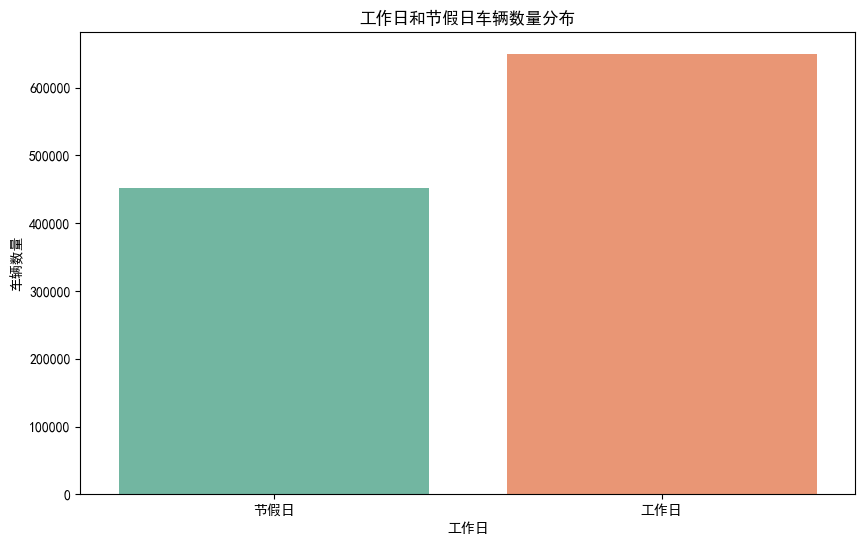

In [85]:
# 将时间按日期划分成工作日和节假日
# 将周一至周五划分工作日，周六周日划分为节假日
df1_zz['日期'] = df1_zz['时间'].dt.date
df1_zz['工作日'] = df1_zz['时间'].dt.dayofweek < 5
# 将4月4号划分为节假日
df1_zz.loc[df1_zz['日期'] == pd.to_datetime('2024-04-04').date(), '工作日'] = False
df1_zz.loc[df1_zz['日期'] == pd.to_datetime('2024-04-05').date(), '工作日'] = False
# 将4月7号和4月28号划分为工作日
df1_zz.loc[df1_zz['日期'] == pd.to_datetime('2024-04-07').date(), '工作日'] = True
df1_zz.loc[df1_zz['日期'] == pd.to_datetime('2024-04-28').date(), '工作日'] = True
# 将5月1号至5月5号划分为节假日
for date in pd.date_range(start='2024-05-01', end='2024-05-05'):
    df1_zz.loc[df1_zz['日期'] == date.date(), '工作日'] = False

# 检查工作日和节假日的划分
print("工作日和节假日统计：")
print(df1_zz['工作日'].value_counts())
# 保存清洗后的数据
df1_zz.to_csv('./问题1支撑材料/节假日划分.csv', index=False, encoding='gbk')
# 可视化工作日和节假日的车辆数量分布
plt.figure(figsize=(10, 6))
sns.countplot(x='工作日', data=df1_zz, palette='Set2')
plt.title('工作日和节假日车辆数量分布')
plt.xlabel('工作日')
plt.ylabel('车辆数量')
plt.xticks(ticks=[0, 1], labels=['节假日', '工作日'])
plt.show()

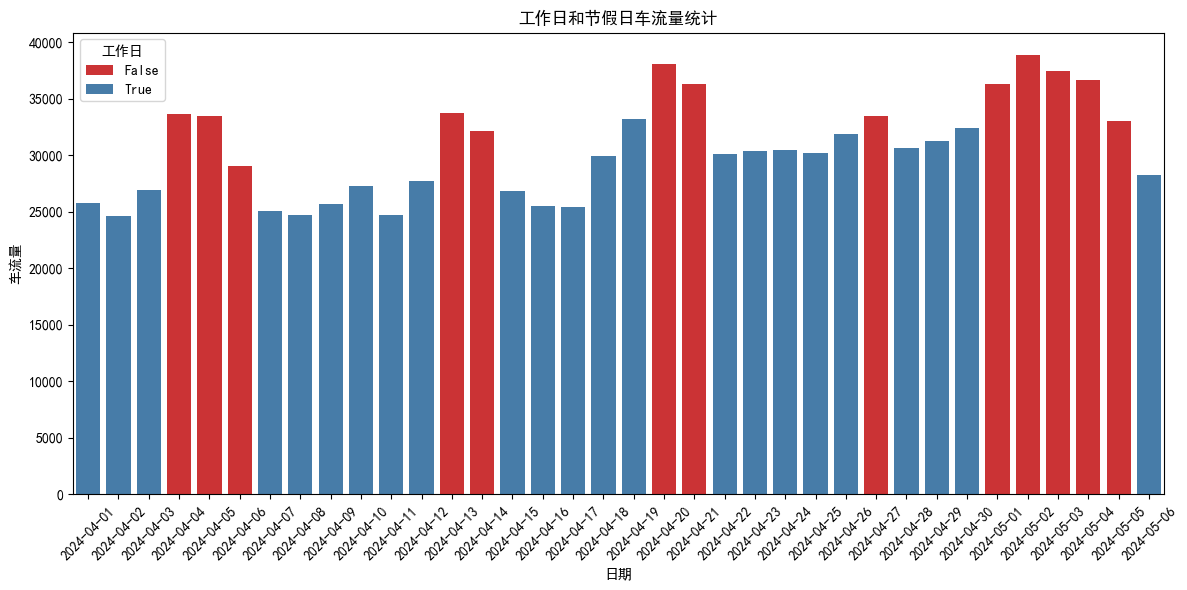

In [86]:
# 统计车流量，将工作日和节假日的车流量进行统计
traffic_count = df1_zz.groupby(['日期', '工作日']).size().reset_index(name='车流量')
# 可视化工作日和节假日的车流量
plt.figure(figsize=(12, 6))
sns.barplot(x='日期', y='车流量', hue='工作日', data=traffic_count, palette='Set1')
plt.title('工作日和节假日车流量统计')
plt.xlabel('日期')
plt.ylabel('车流量')
plt.xticks(rotation=45)
plt.legend(title='工作日')
plt.tight_layout()
# 保存图片
plt.savefig('./问题1支撑材料/工作日和节假日车流量统计.png')
plt.show()



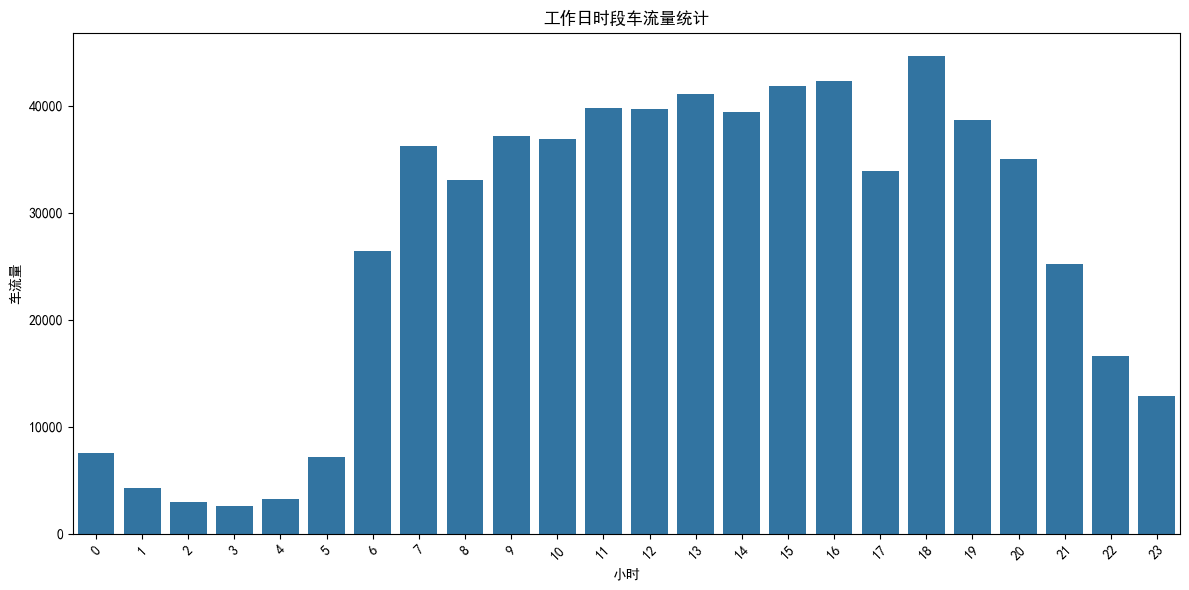

In [87]:
# 统计工作日的时段车流量
traffic_by_time = df1_zz[df1_zz['工作日']].groupby(df1_zz['时间'].dt.hour).size().reset_index(name='车流量')
# 可视化工作日时段车流量，颜色单调一点
plt.figure(figsize=(12, 6))
sns.barplot(x='时间', y='车流量', data=traffic_by_time)
plt.xticks(ticks=range(0, 24), labels=range(0, 24), rotation=45)
plt.title('工作日时段车流量统计')
plt.xlabel('小时')
plt.ylabel('车流量')
plt.tight_layout()
# 保存工作日时段车流量统计图
plt.savefig('./问题1支撑材料/工作日时段车流量统计.png')
plt.show()

# 将工作日时段车流量数据保存为csv文件
traffic_by_time.to_csv('./问题1支撑材料/工作日时段车流量.csv', index=False, encoding='gbk')

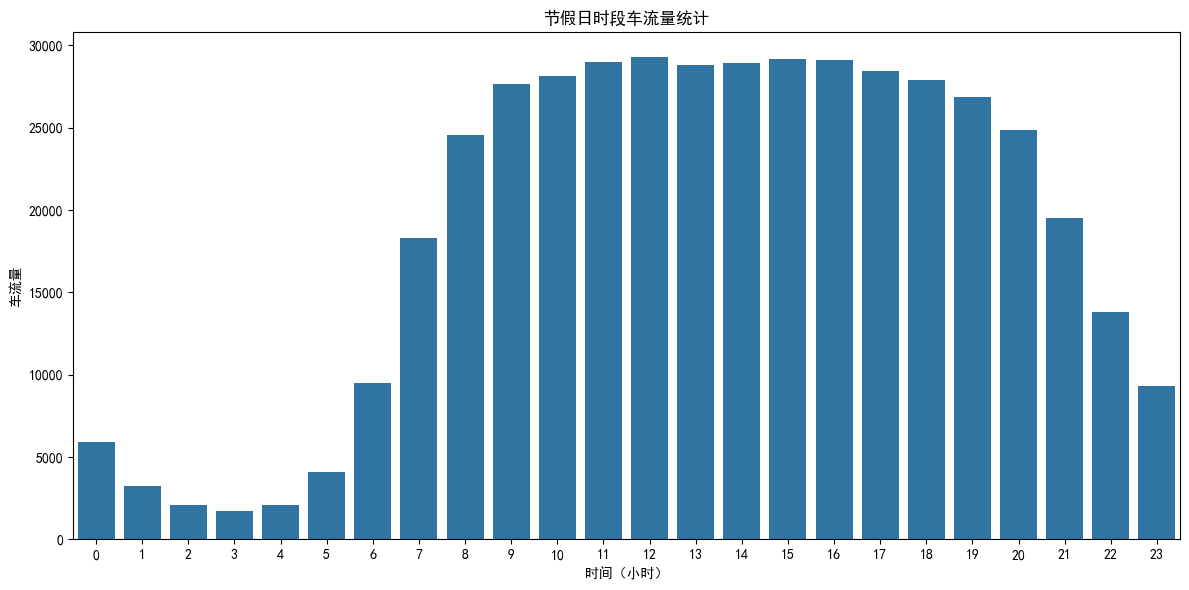

In [88]:
# 统计节假日的时段车流量
traffic_by_time_holiday = df1_zz[~df1_zz['工作日']].groupby(df1_zz['时间'].dt.hour).size().reset_index(name='车流量')
plt.figure(figsize=(12, 6))
sns.barplot(x='时间', y='车流量', data=traffic_by_time_holiday)
plt.title('节假日时段车流量统计')
plt.xlabel('时间（小时）')
plt.ylabel('车流量')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('./问题1支撑材料/节假日时段车流量统计.png')
plt.show()
# 将节假日时段车流量数据保存为csv文件
traffic_by_time_holiday.to_csv('./问题1支撑材料/节假日时段车流量.csv', index=False, encoding='gbk')

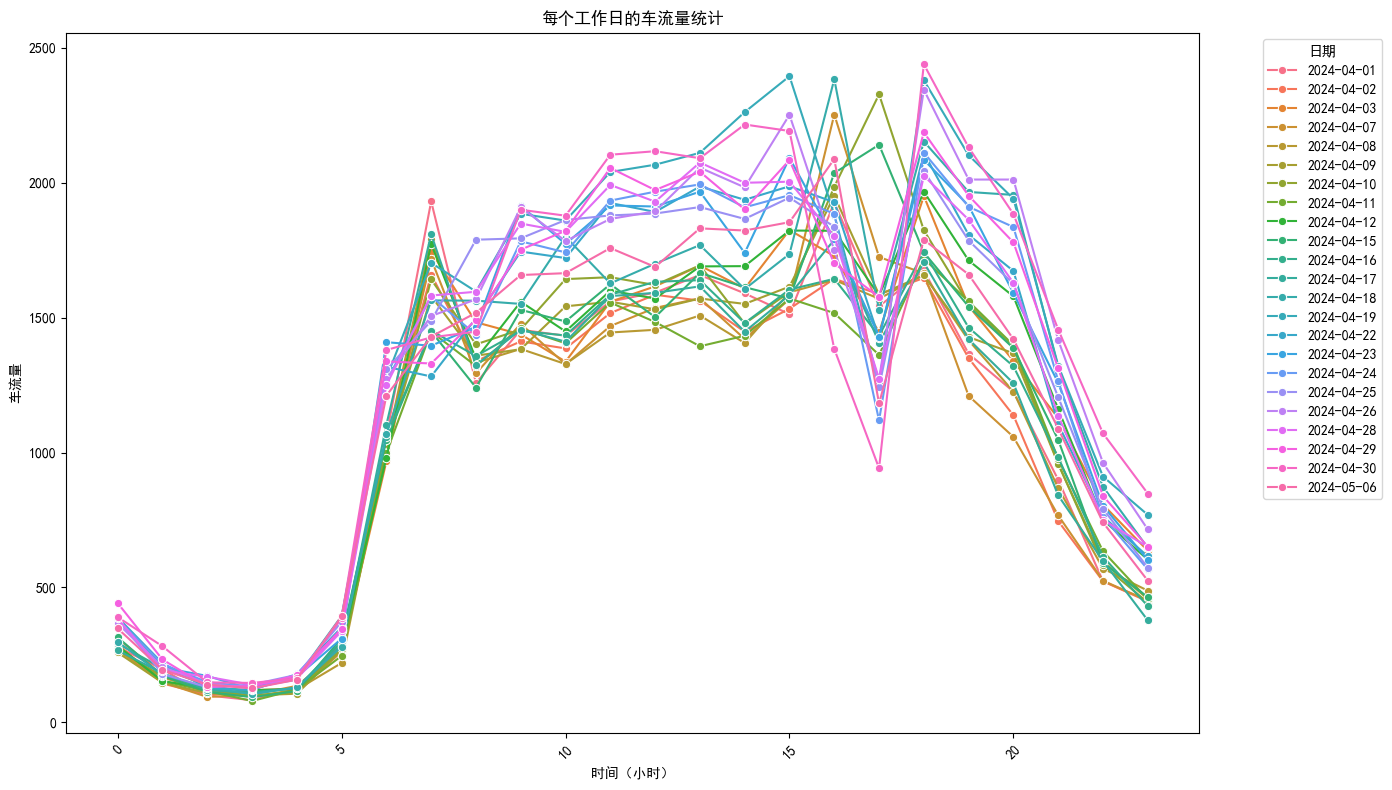

In [89]:
# 将每个工作日的车流量数据按照时段划分
traffic_by_day = df1_zz[df1_zz['工作日']].groupby([df1_zz['日期'], df1_zz['时间'].dt.hour]).size().reset_index(name='车流量')
# 可视化每个工作日的车流量
plt.figure(figsize=(14, 8))
sns.lineplot(data=traffic_by_day, x='时间', y='车流量', hue='日期', marker='o')
plt.title('每个工作日的车流量统计')
plt.xlabel('时间（小时）')
plt.ylabel('车流量')
plt.xticks(rotation=45)
plt.legend(title='日期', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./问题1支撑材料/每个工作日的车流量统计.png')
plt.show()
# 将每个工作日的车流量数据保存为csv文件
traffic_by_day.to_csv('./问题1支撑材料/每个工作日的车流量.csv', index=False, encoding='gbk')

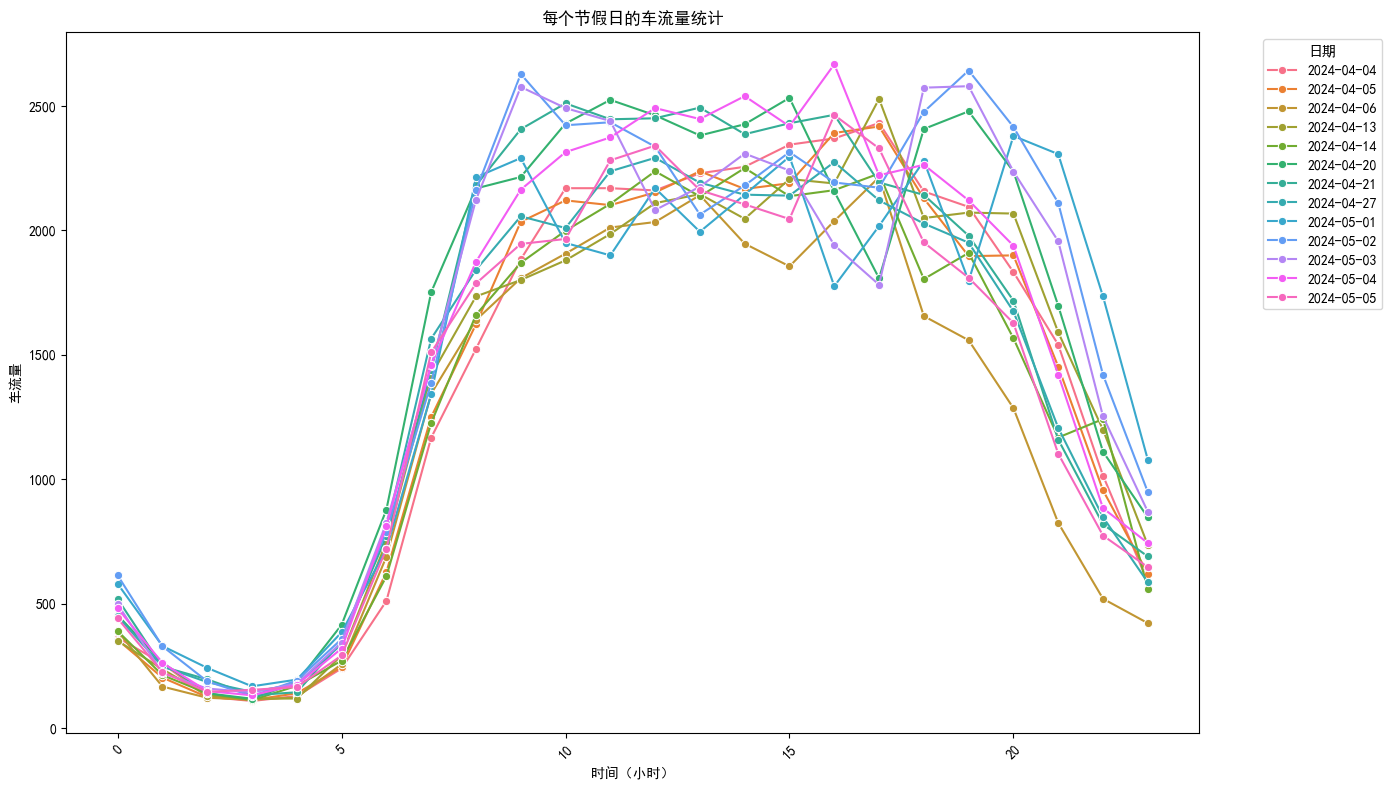

In [90]:
# 将每个节假日的车流量数据按照时段划分
traffic_by_day_holiday = df1_zz[~df1_zz['工作日']].groupby([df1_zz['日期'], df1_zz['时间'].dt.hour]).size().reset_index(name='车流量')
# 可视化每个节假日的车流量，颜色差距大一些
plt.figure(figsize=(14, 8))
sns.lineplot(data=traffic_by_day_holiday, x='时间', y='车流量', hue='日期', marker='o')
plt.title('每个节假日的车流量统计')
plt.xlabel('时间（小时）')
plt.ylabel('车流量')
plt.xticks(rotation=45)
plt.legend(title='日期', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./问题1支撑材料/每个节假日的车流量统计.png')
plt.show()
# 将每个节假日的车流量数据保存为csv文件
traffic_by_day_holiday.to_csv('./问题1支撑材料/每个节假日的车流量.csv', index=False, encoding='gbk')

In [91]:

from sklearn.preprocessing import StandardScaler

data_workday = pd.read_csv('./问题1支撑材料/每个工作日的车流量.csv', encoding='gbk')
data_holiday = pd.read_csv('./问题1支撑材料/每个节假日的车流量.csv', encoding='gbk')

# 对数据进行标准化处理
scaler = StandardScaler()
data_workday_scaled = scaler.fit_transform(data_workday[['车流量']])
data_holiday_scaled = scaler.fit_transform(data_holiday[['车流量']])

# 检查数据
print("工作日数据统计：")
print(data_workday.head())
print("节假日数据统计：")
print(data_holiday.head())




工作日数据统计：
           日期  时间  车流量
0  2024-04-01   0  279
1  2024-04-01   1  197
2  2024-04-01   2  100
3  2024-04-01   3   82
4  2024-04-01   4  125
节假日数据统计：
           日期  时间  车流量
0  2024-04-04   0  364
1  2024-04-04   1  260
2  2024-04-04   2  126
3  2024-04-04   3  109
4  2024-04-04   4  129


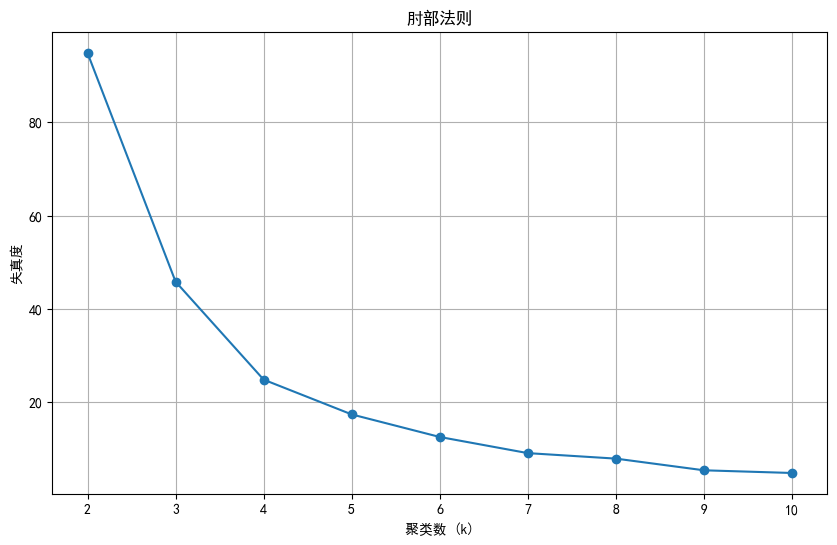

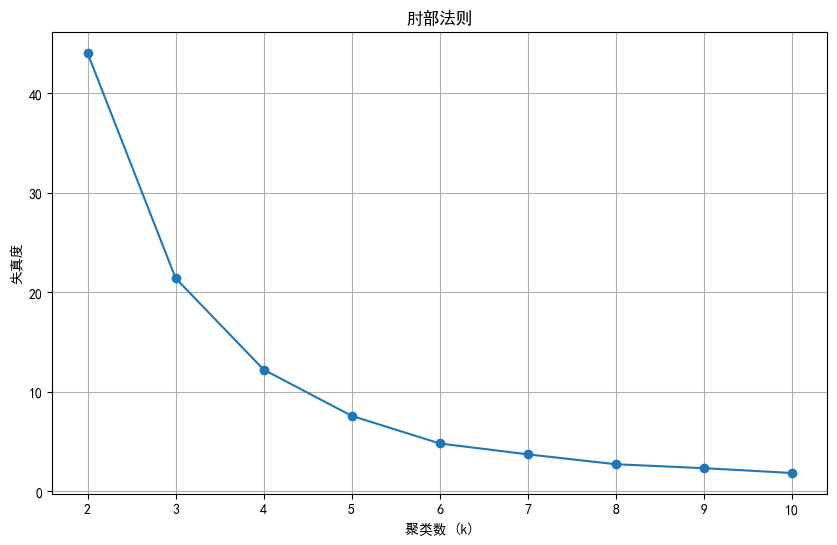

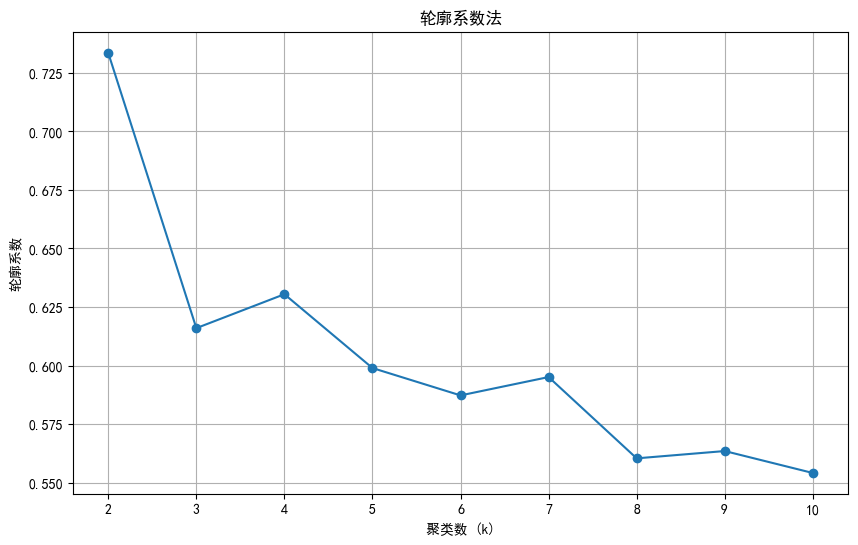

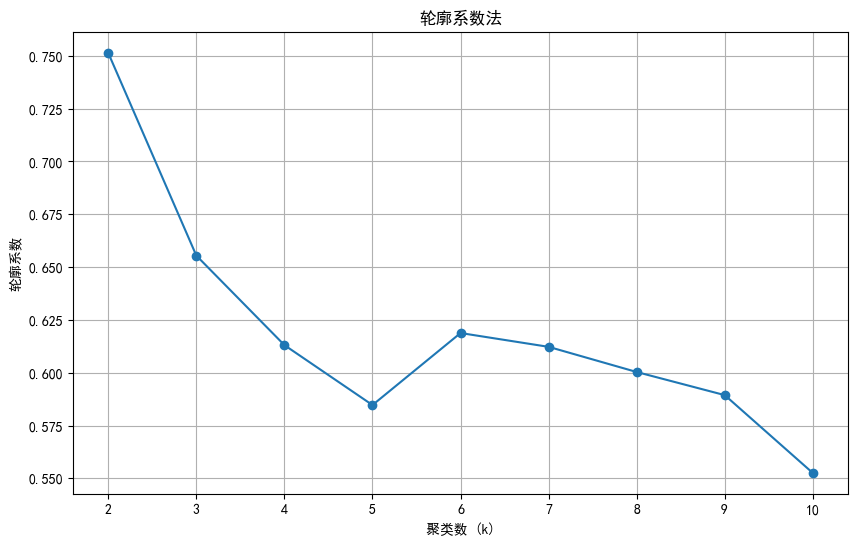

In [92]:
"""

问题一解决，使用k-means算法对工作日和节假日的车流量进行聚类分析,进行划分时段

"""


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 通过肘部法则和轮廓系数法这两种方法来确定最佳的聚类数
def find_optimal_clusters(data, max_k=10):
    """
    使用肘部法则和轮廓系数法来确定最佳的聚类数
    """
    distortions = []
    silhouette_scores = []
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        
        # 计算肘部法则的失真度
        distortions.append(kmeans.inertia_)
        
        # 计算轮廓系数
        if k > 1:
            score = silhouette_score(data, kmeans.labels_)
            silhouette_scores.append(score)
    
    return distortions, silhouette_scores

# 使用肘部法则和轮廓系数法来确定最佳的聚类数
distortions_workday, silhouette_scores_workday = find_optimal_clusters(data_workday_scaled)
distortions_holiday, silhouette_scores_holiday = find_optimal_clusters(data_holiday_scaled)

def plot_elbow_method(distortions, filename=None):
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, len(distortions) + 2), distortions, marker='o')
    plt.title('肘部法则')
    plt.xlabel('聚类数 (k)')
    plt.ylabel('失真度')
    plt.xticks(range(2, len(distortions) + 2))
    plt.grid()
    if filename:
        plt.savefig(filename)
    plt.show()

def plot_silhouette_scores(silhouette_scores, filename=None):
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    plt.title('轮廓系数法')
    plt.xlabel('聚类数 (k)')
    plt.ylabel('轮廓系数')
    plt.xticks(range(2, len(silhouette_scores) + 2))
    plt.grid()
    if filename:
        plt.savefig(filename)
    plt.show()

# 绘图并保存
plot_elbow_method(distortions_workday, './问题1支撑材料/肘部法则_workday.png')
plot_elbow_method(distortions_holiday, './问题1支撑材料/肘部法则_holiday.png')
plot_silhouette_scores(silhouette_scores_workday, './问题1支撑材料/轮廓系数_workday.png')
plot_silhouette_scores(silhouette_scores_holiday, './问题1支撑材料/轮廓系数_holiday.png')



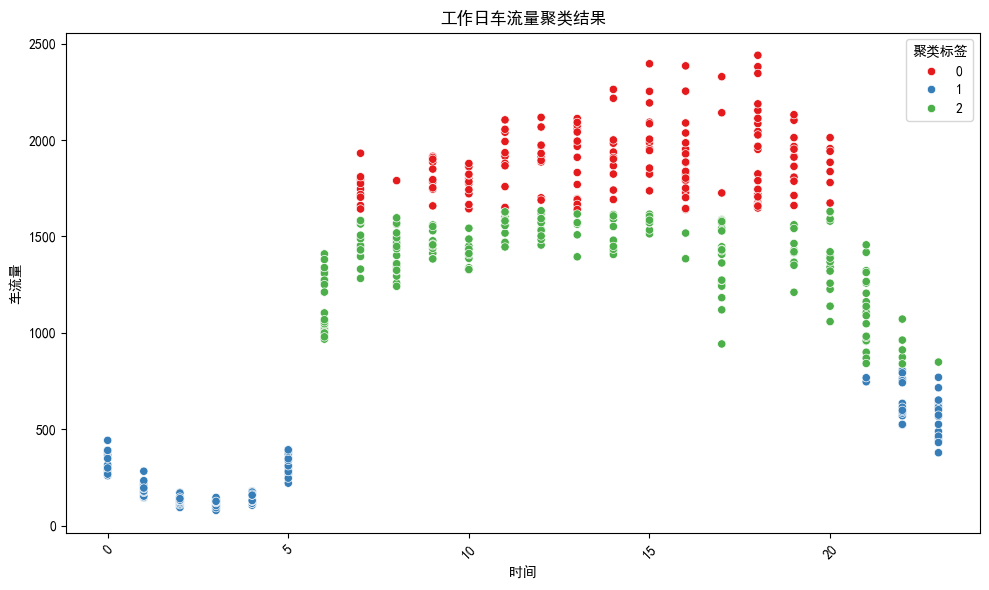

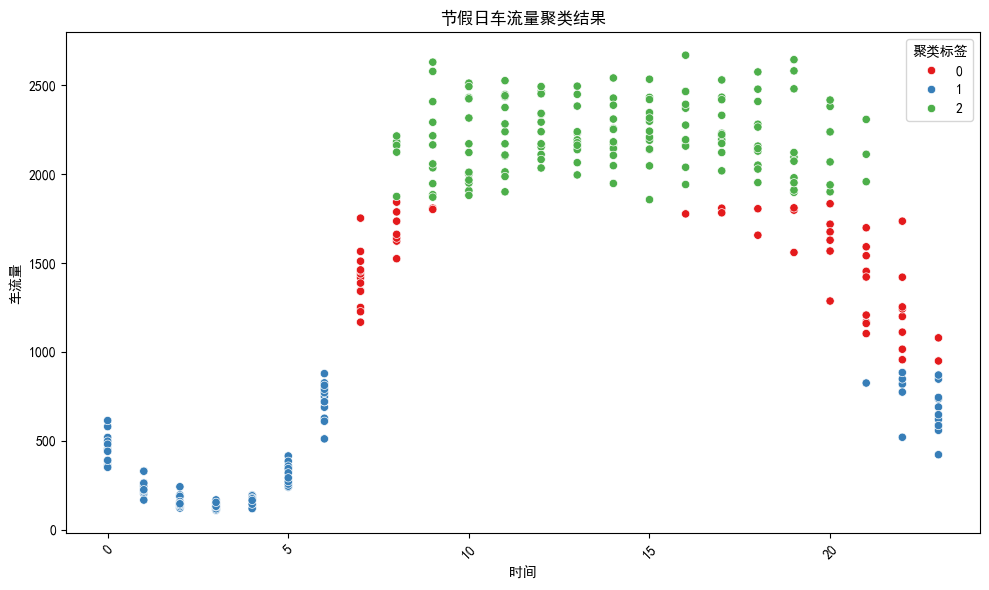

In [93]:
# 对工作日数据进行聚类分析
kmeans_workday = KMeans(n_clusters=3, random_state=42)
kmeans_workday.fit(data_workday_scaled)
# 将聚类结果添加到数据中
data_workday['聚类标签'] = kmeans_workday.labels_
# 可视化工作日聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='时间', y='车流量', hue='聚类标签', data=data_workday, palette='Set1')
plt.title('工作日车流量聚类结果')
plt.xlabel('时间')
plt.ylabel('车流量')
plt.xticks(rotation=45)
plt.legend(title='聚类标签')
plt.tight_layout()
plt.savefig('./问题1支撑材料/工作日车流量聚类结果.png')
plt.show()

# 对节假日数据进行聚类分析
kmeans_holiday = KMeans(n_clusters=3, random_state=42)
kmeans_holiday.fit(data_holiday_scaled)
# 将聚类结果添加到数据中
data_holiday['聚类标签'] = kmeans_holiday.labels_
# 可视化节假日聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='时间', y='车流量', hue='聚类标签', data=data_holiday, palette='Set1')
plt.title('节假日车流量聚类结果')
plt.xlabel('时间')
plt.ylabel('车流量')
plt.xticks(rotation=45)
plt.legend(title='聚类标签')
plt.tight_layout()
plt.savefig('./问题1支撑材料/节假日车流量聚类结果.png')
plt.show()


工作日时段划分结果：
           日期  时间  车流量  聚类标签  时段
0  2024-04-01   0  279     1  低峰
1  2024-04-01   1  197     1  低峰
2  2024-04-01   2  100     1  低峰
3  2024-04-01   3   82     1  低峰
4  2024-04-01   4  125     1  低峰
节假日时段划分结果：
           日期  时间  车流量  聚类标签  时段
0  2024-04-04   0  364     1  低峰
1  2024-04-04   1  260     1  低峰
2  2024-04-04   2  126     1  低峰
3  2024-04-04   3  109     1  低峰
4  2024-04-04   4  129     1  低峰


C:\Users\hhui8\AppData\Local\Temp\ipykernel_23616\3640148693.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='时段', data=data_workday, palette='Set2')


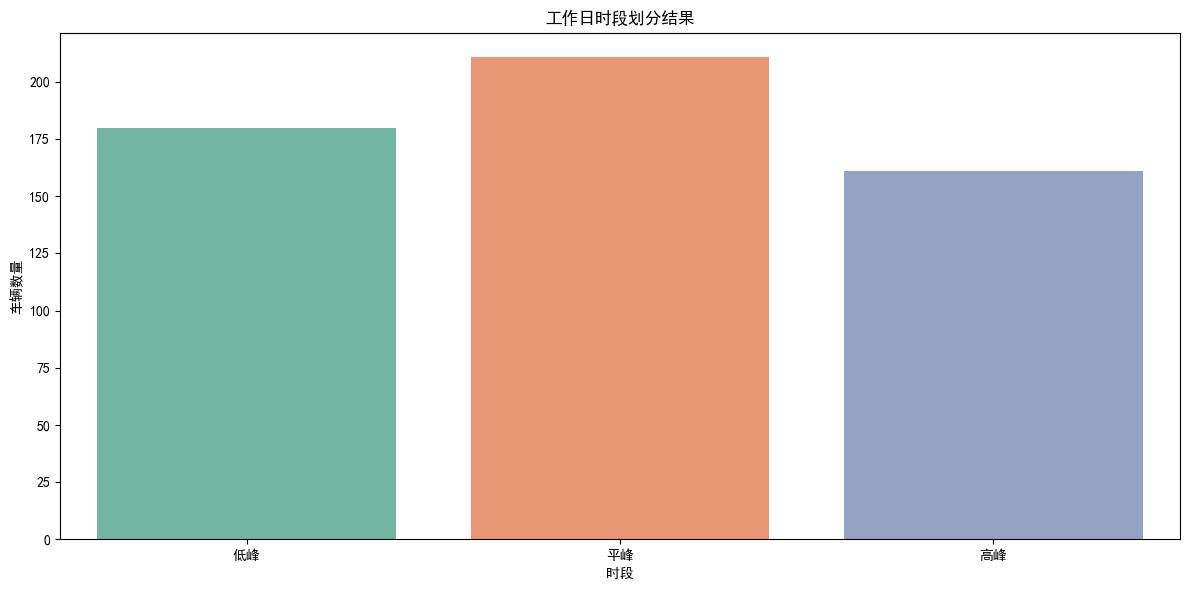

C:\Users\hhui8\AppData\Local\Temp\ipykernel_23616\3640148693.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='时段', data=data_holiday, palette='Set2')


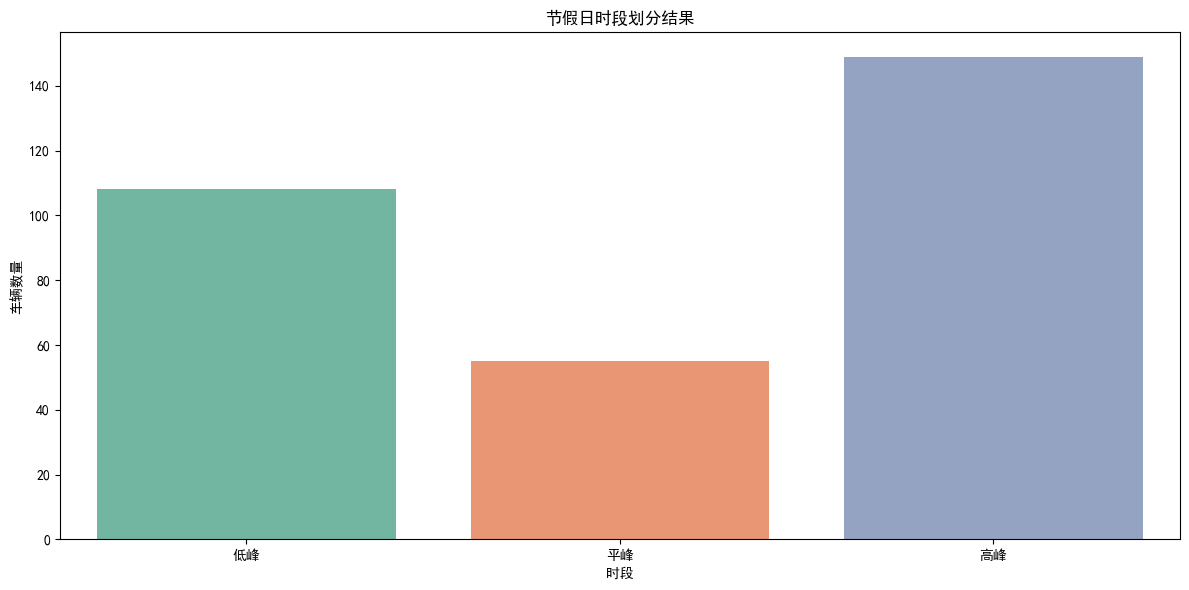

In [94]:
# 划分时段
def assign_time_period_work(row):
    if row['聚类标签'] == 0:
        return '高峰'
    elif row['聚类标签'] == 1:
        return '低峰'
    elif row['聚类标签'] == 2:
        return '平峰'
def assign_time_period_holiday(row):
    if row['聚类标签'] == 0:
        return '平峰'
    elif row['聚类标签'] == 1:
        return '低峰'
    elif row['聚类标签'] == 2:
        return '高峰'
    
data_workday['时段'] = data_workday.apply(assign_time_period_work, axis=1)
data_holiday['时段'] = data_holiday.apply(assign_time_period_holiday, axis=1)
# 保存工作日和节假日的时段划分结果
data_workday.to_csv('./问题1支撑材料/工作日时段划分.csv', index=False, encoding='gbk')
data_holiday.to_csv('./问题1支撑材料/节假日时段划分.csv', index=False, encoding='gbk')
# 检查工作日和节假日的时段划分结果
print("工作日时段划分结果：")
print(data_workday[['日期', '时间', '车流量', '聚类标签', '时段']].head())
print("节假日时段划分结果：")
print(data_holiday[['日期', '时间', '车流量', '聚类标签', '时段']].head())

# 可视化工作日的时段划分结果
plt.figure(figsize=(12, 6))
sns.countplot(x='时段', data=data_workday, palette='Set2')
plt.title('工作日时段划分结果')
plt.xlabel('时段')
plt.ylabel('车辆数量')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('./问题1支撑材料/工作日时段划分结果.png')
plt.show()

# 可视化节假日的时段划分结果
plt.figure(figsize=(12, 6))
sns.countplot(x='时段', data=data_holiday, palette='Set2')
plt.title('节假日时段划分结果')
plt.xlabel('时段')
plt.ylabel('车辆数量')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('./问题1支撑材料/节假日时段划分结果.png')
plt.show()